# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
DATA_PATH = "wine_quality_white.tsv.gz"
df = pd.read_csv(DATA_PATH, sep='\t')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.sample(10,random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
4632,6.3,0.30,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.700000,6
2244,7.0,0.36,0.14,11.60,0.043,35.0,228.0,0.99770,3.13,0.51,8.900000,5
1924,7.6,0.26,0.36,1.60,0.032,6.0,106.0,0.99300,3.15,0.40,10.400000,4
3801,8.3,0.18,0.30,1.10,0.033,20.0,57.0,0.99109,3.02,0.51,11.000000,6
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.700000,5


There are no missing values in the dataset.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

| Column | Description |
|--------|-------------|
| fixed acidity | Non-volatile acids which do not evaporate and contribute to the wine's structure and preservation. |
| volatile acidity | Acids that can evaporate easily (like acetic acid); high levels can make the wine taste sour or vinegary. |
| citric acid | A type of organic acid that can add freshness and flavor to the wine. |
| residual sugar | The amount of sugar left after fermentation, influencing sweetness. |
| chlorides | The amount of salt in the wine, affecting taste and preservation. |
| free sulfur dioxide | Sulfur dioxide present in the wine that is not bound to other compounds, acting as a preservative and antimicrobial agent. |
| total sulfur dioxide | Sum of free and bound sulfur dioxide; overall indicator of preservative content. |
| density | Mass per unit volume of the wine; influenced by sugar, alcohol, and other dissolved solids. |
| pH | Acidity level of the wine on a scale from 0–14; lower pH is more acidic. |
| sulphates | Compounds that contribute to wine’s preservation and can enhance flavor stability. |
| alcohol | Percentage of alcohol by volume in the wine. |
| target | Wine quality rating (usually from 0–10), which is the value we want to predict. |

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

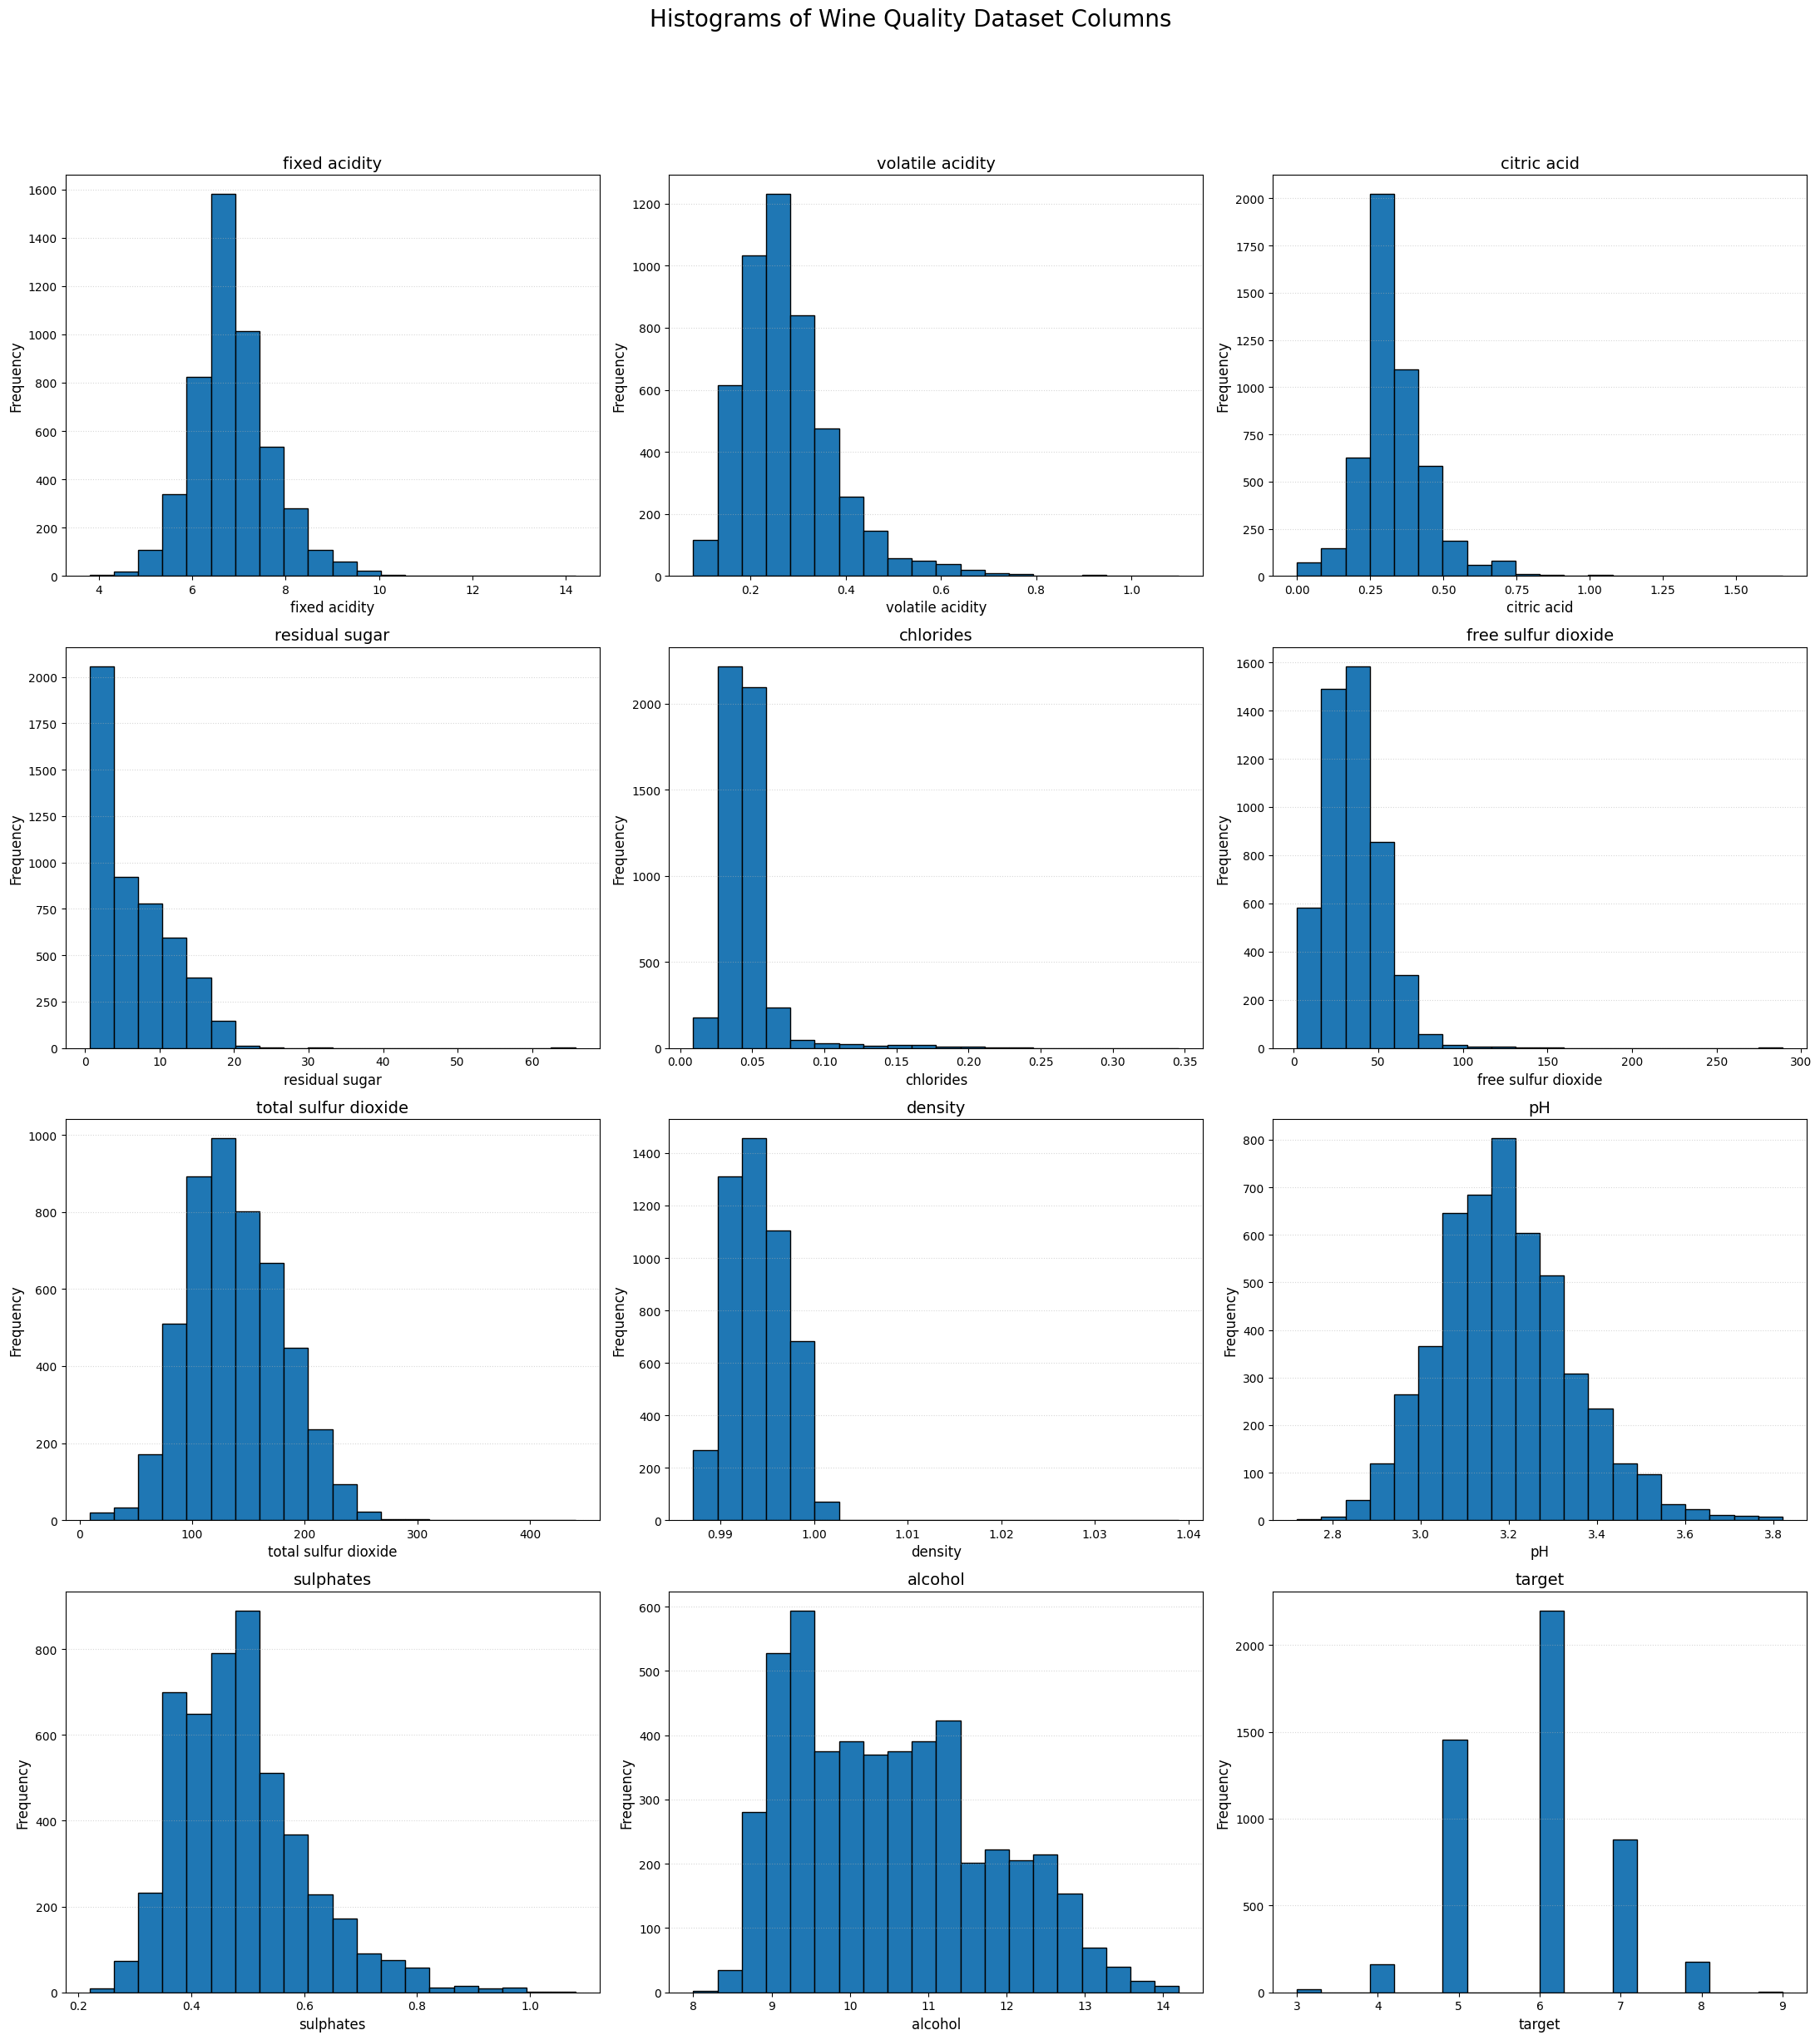

<Figure size 640x480 with 0 Axes>

In [6]:
cols = df.columns
n_cols = len(cols)
n_rows = (n_cols + 2) // 3   # 3 plots per row for better readability

plt.figure(figsize=(22, 6 * n_rows))
plt.suptitle('Histograms of Wine Quality Dataset Columns', fontsize=20, y=1.02)

for i, col in enumerate(cols):
    plt.subplot(n_rows, 3, i + 1)

    if pd.api.types.is_numeric_dtype(df[col]):
        plt.hist(df[col].dropna(), bins=20, edgecolor='black')
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    else:
        df[col].value_counts().sort_index().plot(kind='bar', edgecolor='black')
        plt.xlabel(col, fontsize=12)
        plt.xticks(rotation=45)

    plt.title(col, fontsize=14)
    plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

| Column | Distribution Shape |
|--------|------------------|
| fixed acidity | Positively skewed | 
| volatile acidity | Positively skewed | 
| citric acid | Positively skewed | 
| residual sugar | Strongly positively skewed |
| chlorides | Positively skewed |
| free sulfur dioxide | Positively skewed | 
| total sulfur dioxide | Positively skewed | 
| density | Positively skewed | 
| pH | Approximately normal | 
| sulphates | Positively skewed | 
| alcohol | Slightly positively skewed | 
| target | Categorical | 

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

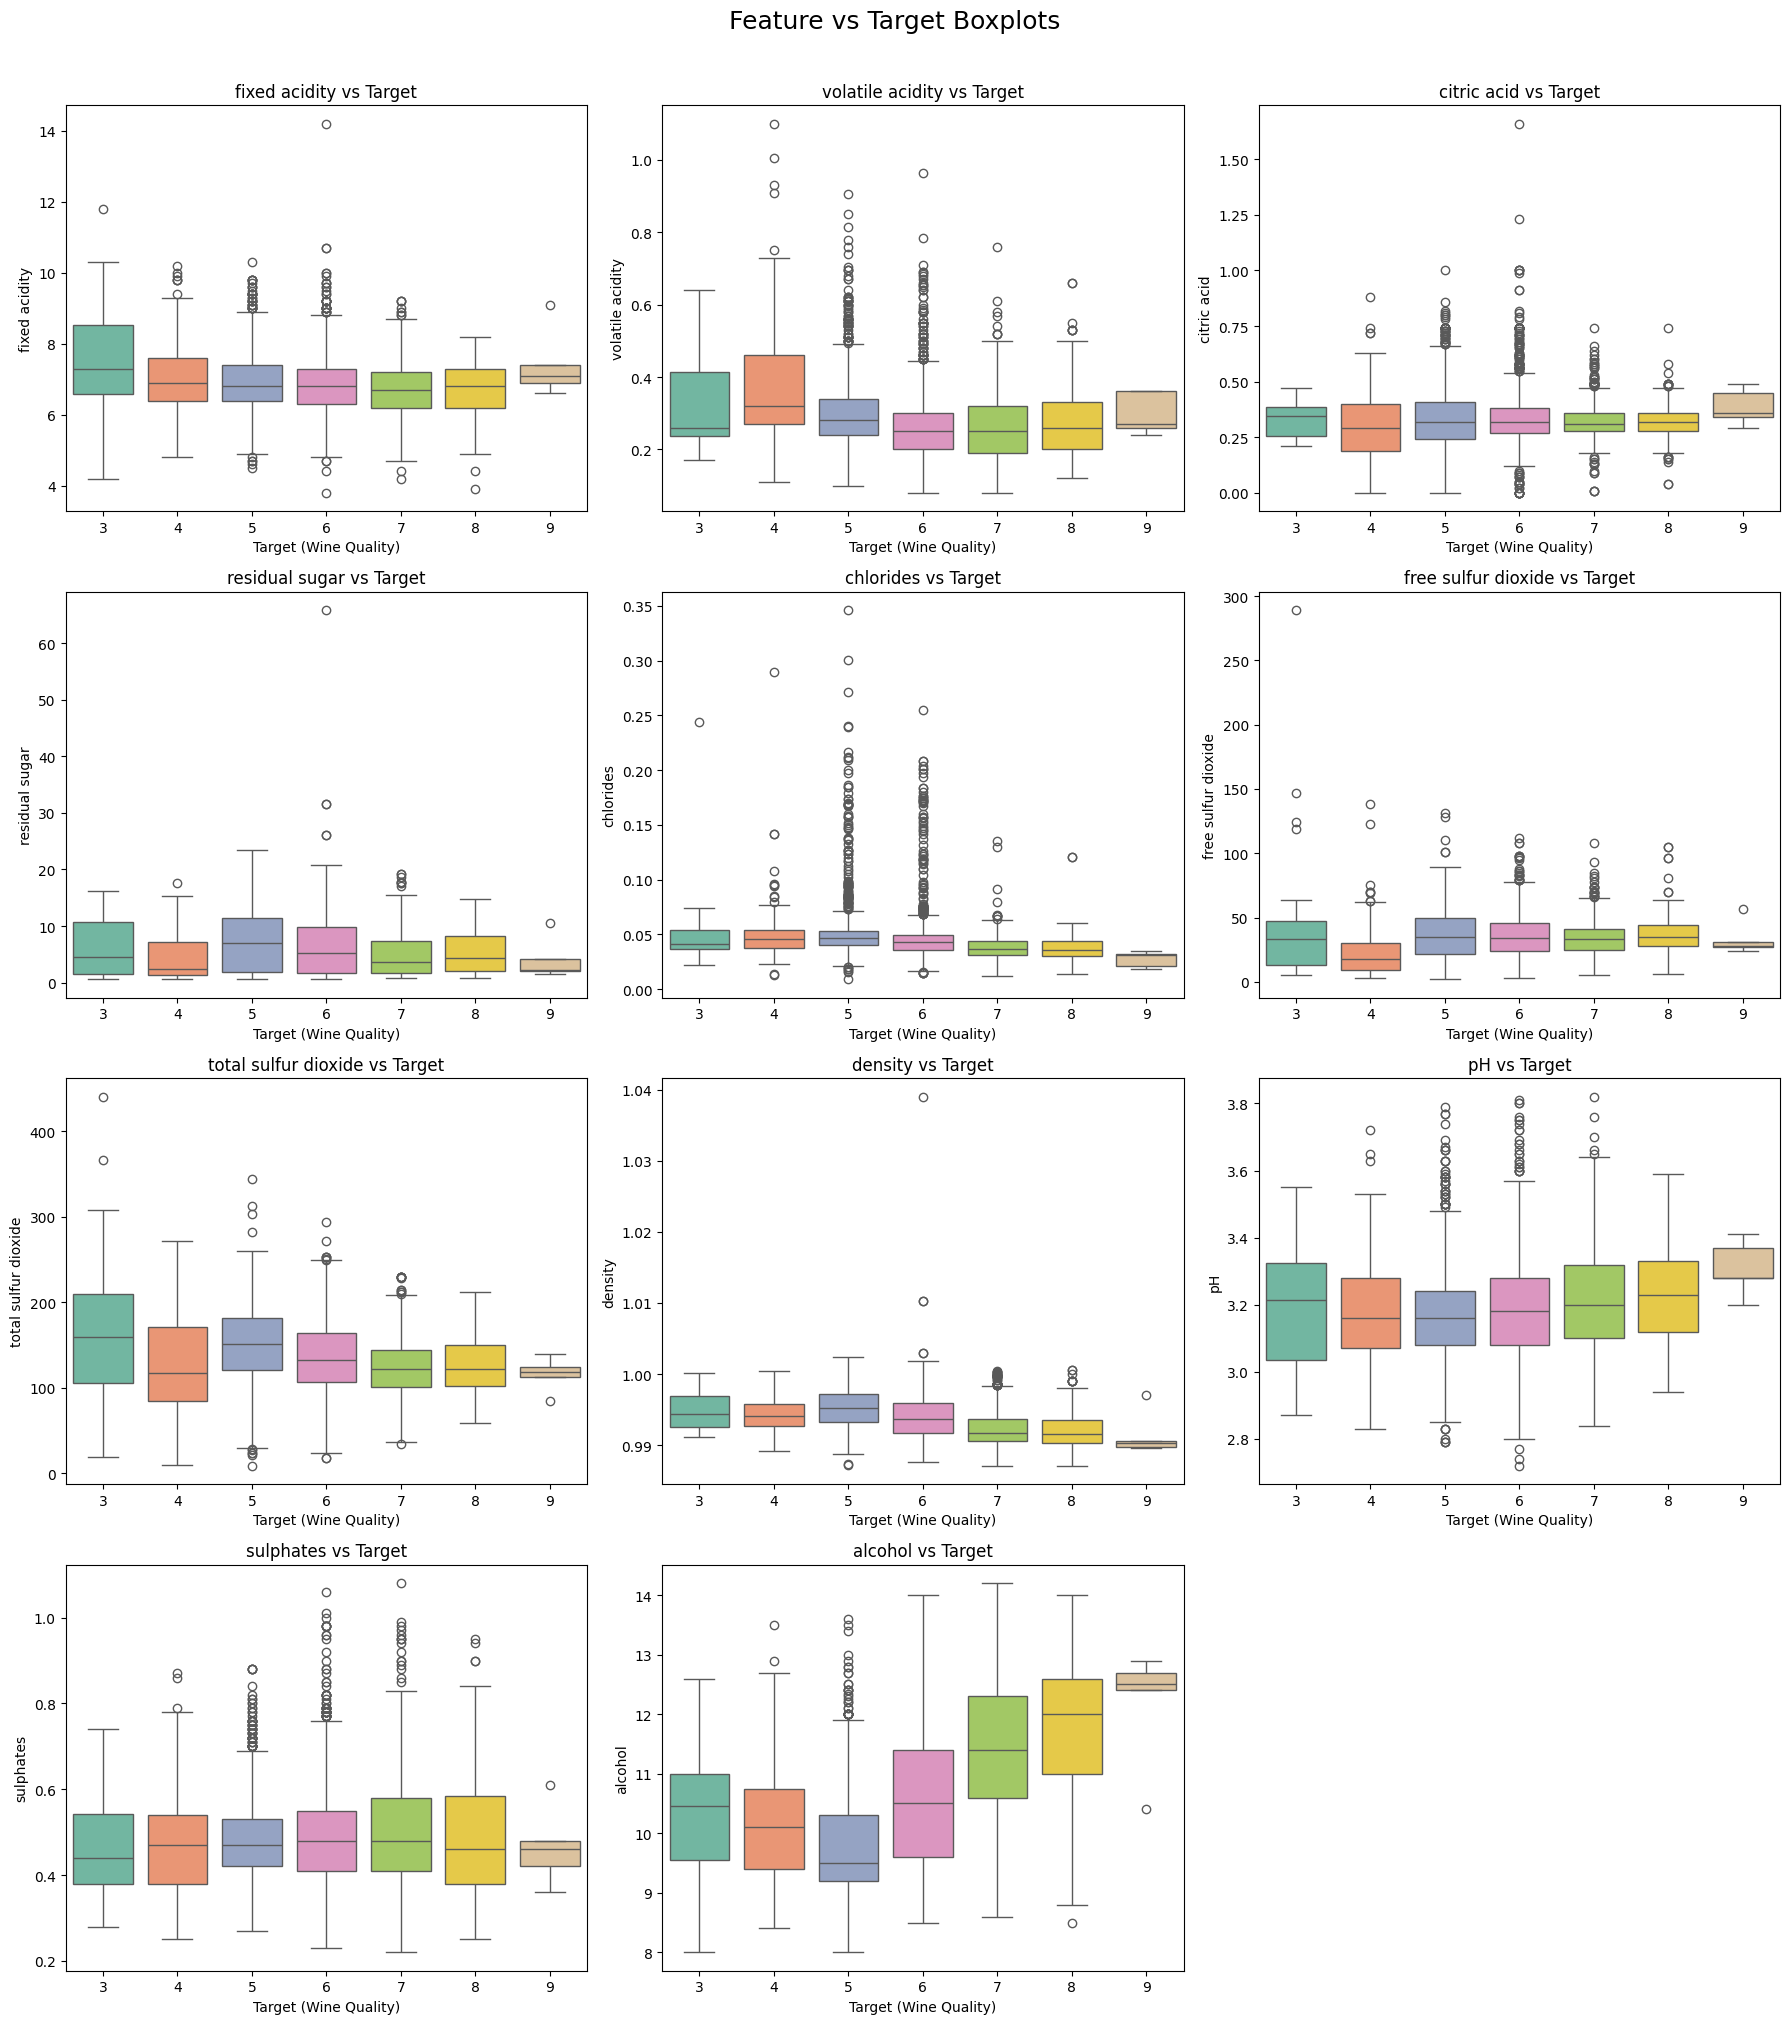

In [7]:
import seaborn as sns

feature_cols = df.columns.drop('target')

n_cols = 3
n_rows = (len(feature_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18,5 * n_rows))
plt.suptitle('Feature vs Target Boxplots', fontsize=18, y=1.01)

for i, col in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(
        data=df,
        x="target",
        y=col,
        hue="target",
        dodge=False,
        legend=False,
        palette="Set2"
    )

    plt.title(f'{col} vs Target')
    plt.xlabel('Target (Wine Quality)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


| Feature | Dependent/Independent | Explanation |
|--------|------------------|------------------|
| fixed acidity | Independent| The median and spread are similar across wine qualities and there is an overlap of distribution |  
| volatile acidity | Dependent | Lower quality wines have higher volatile acidity | 
| citric acid | Dependent| The median slightly increases for higher-quality wines | 
| residual sugar | Dependent | The spread shows some variation | 
| chlorides | Dependent | Higher chlorides appear in lower-quality wines |
| free sulfur dioxide | Dependent | Some variation is present in median and spread across wine quality levels |
| total sulfur dioxide | Dependent | The distribution shape changes across wine quality levels |
| density | Dependent | Lower density values are more common in higher-quality wines |
| pH | Independent | Medians are nearly identical across quality levels |
| sulphates | Dependent | Higher-quality wines have higher sulphates | 
| alcohol | Dependent | Alcohol content increases with quality; Medians are clearly distributed across quality levels |

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error (MSE) on the whole dataset: 0.5632


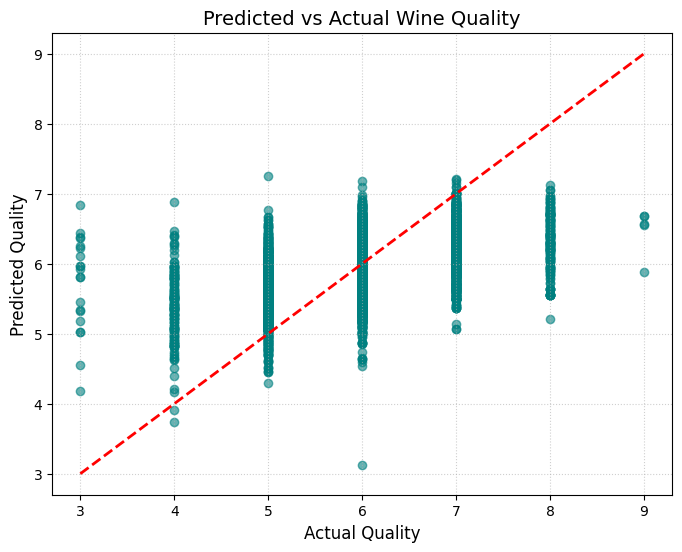

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Features and target
X = df.drop('target', axis=1)
y = df['target']

# One-Hot Encode only categorical columns (if any)
X_encoded = pd.get_dummies(X, drop_first=True)

# Build and fit OLS model
model = LinearRegression()
model.fit(X_encoded, y)

# Predict
y_pred = model.predict(X_encoded)

# Evaluate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE) on the whole dataset: {mse:.4f}")

# Plot actual (x-axis) vs predicted (y-axis)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='teal')

# Reference line y = x
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.title('Predicted vs Actual Wine Quality', fontsize=14)
plt.xlabel('Actual Quality', fontsize=12)
plt.ylabel('Predicted Quality', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

The mean squared error (MSE) of the model on the entire dataset is 0.5632, which indicates that the average squared difference between the predicted and actual wine quality values.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


fixed acidity: MSE = 0.7741
volatile acidity: MSE = 0.7545
citric acid: MSE = 0.7841
residual sugar: MSE = 0.7767
chlorides: MSE = 0.7496
free sulfur dioxide: MSE = 0.7841
total sulfur dioxide: MSE = 0.7603
density: MSE = 0.7102
pH: MSE = 0.7764
sulphates: MSE = 0.7819
alcohol: MSE = 0.6354
Best single feature: alcohol with MSE: 0.6354137863260801


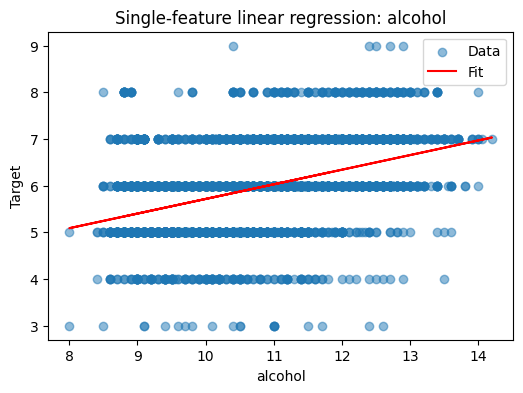

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df.drop('target', axis=1)
y = df['target']

mse_by_feature = {}

for col in X.columns:
    X_col = X[[col]].dropna()        # ensure no NaN  
    y_col = y.loc[X_col.index]       # align target values  
    model = LinearRegression()
    model.fit(X_col, y_col)
    y_pred = model.predict(X_col)
    mse = mean_squared_error(y_col, y_pred)
    mse_by_feature[col] = mse
    print(f"{col}: MSE = {mse:.4f}")

# find best single-feature model
best = min(mse_by_feature, key=mse_by_feature.get)
print("Best single feature:", best, "with MSE:", mse_by_feature[best])

# Plot feature vs target + regression line for best
plt.figure(figsize=(6,4))
plt.scatter(X[best], y, alpha=0.5, label='Data')
plt.plot(X[best], LinearRegression().fit(X[[best]], y).predict(X[[best]]),
         color='red', label='Fit')
plt.xlabel(best)
plt.ylabel('Target')
plt.title(f'Single-feature linear regression: {best}')
plt.legend()
plt.show()


YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Split threshold for alcohol: 10.40


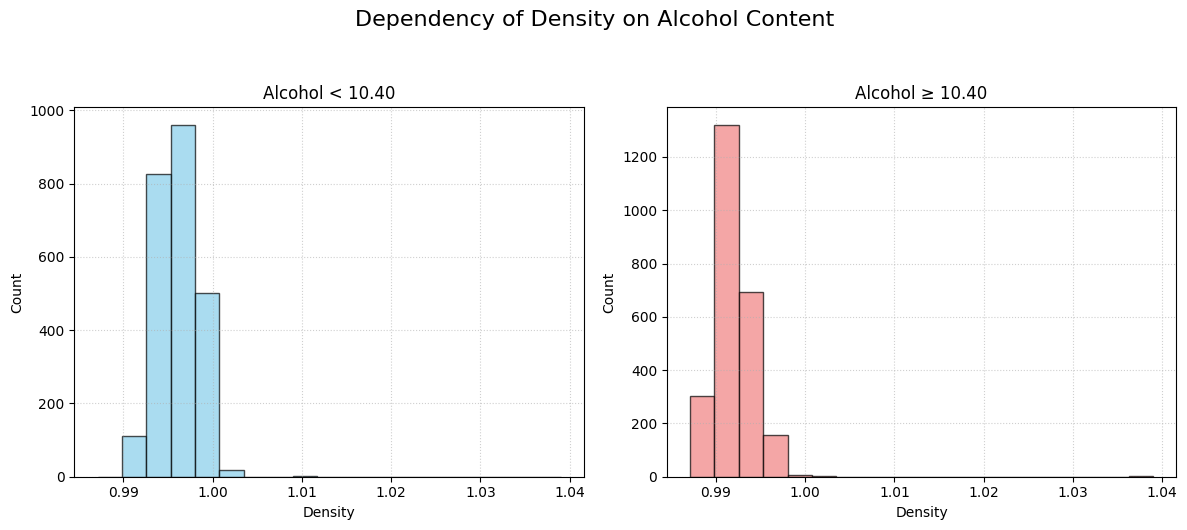

In [6]:
# Choose threshold
t = df['alcohol'].median()
print(f"Split threshold for alcohol: {t:.2f}")

# Split dataset
subset_low = df[df['alcohol'] < t]
subset_high = df[df['alcohol'] >= t]

# Determine common bins for both histograms
bins = np.linspace(df['density'].min(), df['density'].max(), 20)

# Plot two histograms side by side
plt.figure(figsize=(12, 5))

# Histogram for alcohol < t
plt.subplot(1, 2, 1)
plt.hist(subset_low['density'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Alcohol < {t:.2f}')
plt.xlabel('Density')
plt.ylabel('Count')
plt.grid(linestyle=':', alpha=0.6)

# Histogram for alcohol >= t
plt.subplot(1, 2, 2)
plt.hist(subset_high['density'], bins=bins, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title(f'Alcohol ≥ {t:.2f}')
plt.xlabel('Density')
plt.ylabel('Count')
plt.grid(linestyle=':', alpha=0.6)

plt.suptitle('Dependency of Density on Alcohol Content', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Variance explained by first half of PCs: 0.7283 (72.8%)
MSE using first half of PCs: 0.6448


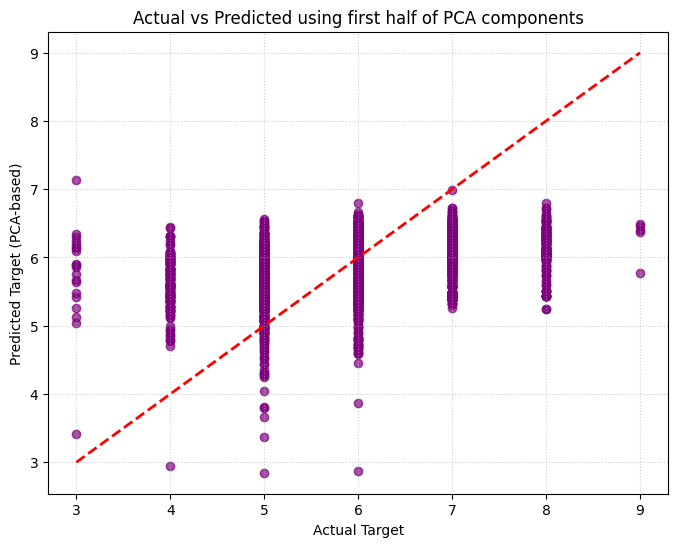

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Features and target
X = df.drop('target', axis=1)
y = df['target']

# 1. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Variance explained by first half of PCs
n_features = X.shape[1]
n_half = n_features // 2

# 4. First half of principal components
n_features = X.shape[1]
n_half = n_features // 2

# 5. Variance explained by first half
variance_first_half = pca.explained_variance_ratio_[:n_half].sum()
print(f"Variance explained by first half of PCs: {variance_first_half:.4f} ({variance_first_half*100:.1f}%)")

# 6. Linear regression using first half of PCs
X_pca_half = X_pca[:, :n_half]
model_pca = LinearRegression()
model_pca.fit(X_pca_half, y)

# 7. Predict
y_pred_pca = model_pca.predict(X_pca_half)

# 8. Compute MSE
mse_pca = mean_squared_error(y, y_pred_pca)
print(f"MSE using first half of PCs: {mse_pca:.4f}")

# 9. Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_pca, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # reference y=x
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target (PCA-based)')
plt.title('Actual vs Predicted using first half of PCA components')
plt.grid(linestyle=':', alpha=0.6)
plt.show()

To reduce dimensionality and analyze variance structure in the input features, I performed Principal Component Analysis (PCA) on the standardized feature set. PCA transforms the original variables into a set of uncorrelated components ordered by the amount of variance they explain. 

Since the dataset has 13 columns. the first half of the principal components correspond to the components that explain the greatest proportion of variation in the data. After fitting the PCA, I calculated the total variance explained by these top components. This value indicates how much of the original structure of the data is retained when only using half of the components. 

Next, I built a linear regression model using only the coordinates from these first PCA components as inputs. This model was then evaluated by computing the mean squared error (MSE) between the predicted and actual wine quality scores.
The MSE of the PCA-based model was 0.6448, which is higher than the MSE of the full ordinary least squares (OLS) model from Problem 5 (0.5632). A higher MSE indicates a worse fit. 

This difference is reasonable because PCA reduces dimensionality and removes some information from the original variables. While the first half of the components capture a large portion of the overall variance, they may not capture the specific variance most relevant for predicting wine quality. As a result, the PCA-based regression model performs slightly worse than the full OLS model.

The first hald of the principal components explained about 72.8% of the total variance, so although it captured most of the structure in the data, enough information was lost during dimensionality reduction to increase the model's MSE compared to the full-feature regression.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

Highest correlated pair: ('residual sugar', 'density') with correlation = 0.8390


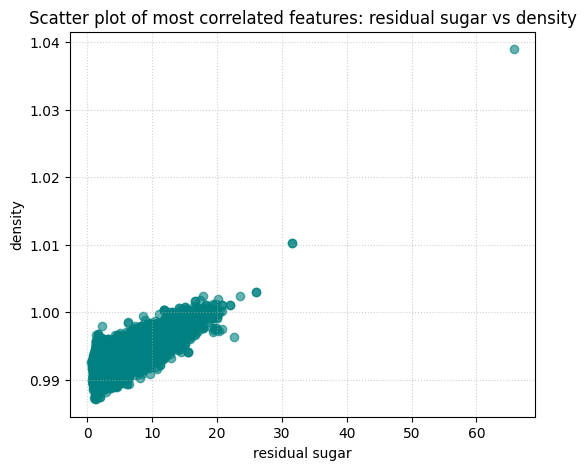

First principal component loadings:

density                 0.511524
residual sugar          0.427408
total sulfur dioxide    0.406652
free sulfur dioxide     0.300334
chlorides               0.212011
fixed acidity           0.157218
citric acid             0.144050
sulphates               0.043379
volatile acidity        0.005089
pH                     -0.128832
alcohol                -0.437238
Name: PC1, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Compute correlation matrix of features
corr_matrix = df.drop('target', axis=1).corr()

# Mask diagonal to ignore self-correlation
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr = corr_matrix.where(mask)

# Find the pair with maximum absolute correlation
max_corr_val = high_corr.abs().max().max()
max_corr_pair = high_corr.abs().stack().idxmax()
print(f"Highest correlated pair: {max_corr_pair} with correlation = {max_corr_val:.4f}")

# 2. Scatter plot of the most correlated features
x_col, y_col = max_corr_pair
plt.figure(figsize=(6, 5))
plt.scatter(df[x_col], df[y_col], alpha=0.6, color='teal')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f'Scatter plot of most correlated features: {x_col} vs {y_col}')
plt.grid(linestyle=':', alpha=0.6)
plt.show()

# 3. PCA to see correlation reflected in components
X_scaled = StandardScaler().fit_transform(df.drop('target', axis=1))
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Component loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])],
                        index=df.drop('target', axis=1).columns)

# Display loadings of the first principal component
print("First principal component loadings:\n")
print(loadings['PC1'].sort_values(ascending=False))


The features residual sugar and density have the highest correlation. This strong correlation is reflected in PCA as both features have the largest loadings in the first principal component, indicating that the main source of variation in the dataset comes from those correlated features.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Most extreme outlier row: index 2781
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2781            7.8             0.965          0.6            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2781                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  target  
2781     11.7       6  


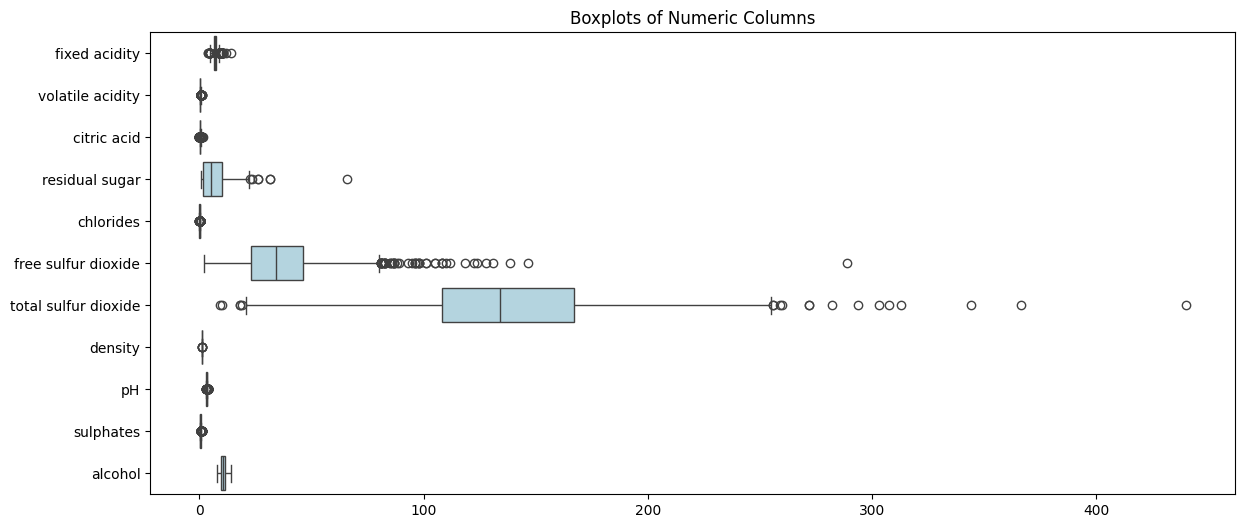

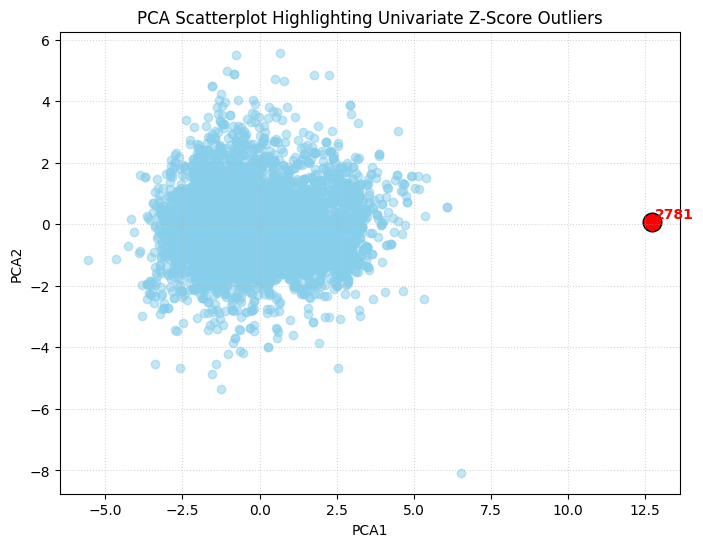

In [5]:
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Compute columnwise z-scores
numeric_cols = df.select_dtypes(include=np.number).columns.drop('target')

# 2. Compute columnwise z-scores
z_scores = df[numeric_cols].apply(zscore)

# 3. Find the row with the maximum absolute z-score across all columns
componentwise_max_z = z_scores.abs().max(axis=1)
max_z_idx = componentwise_max_z.idxmax()
outlier_row = df.loc[[max_z_idx]]
print(f"Most extreme outlier row: index {max_z_idx}")
print(outlier_row)

# 3. Boxplot visualization
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols], orient='h', color='lightblue')
plt.title("Boxplots of Numeric Columns")
plt.show()

# 4. PCA scatterplot highlighting outliers
X_scaled = StandardScaler().fit_transform(df[numeric_cols])
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='skyblue', label="Regular rows")

# Highlight the extreme outlier
plt.scatter(X_pca[max_z_idx,0], X_pca[max_z_idx,1], color='red', s=180, edgecolor='black', label='Most extreme outlier')
plt.text(X_pca[max_z_idx,0]+0.1, X_pca[max_z_idx,1]+0.1, str(max_z_idx), fontsize=10, fontweight='bold', color='red')

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Scatterplot Highlighting Univariate Z-Score Outliers")
plt.grid(linestyle=':', alpha=0.5)
plt.show()


I used the univariate z-score method to detect outliers. For each column, I computed the z-score. I then identified the row where any column had an absolute z-score greater than 3, which is a common threshold for extreme values in normally distributed data. Row 2781 is the most extreme outlier because it had the highest absolute z-score in at least one numeric column. This row is clearly visible in both the boxplots and the PCA scatterplot. It lies outside the whiskers in the boxplot and it is distant from the main cluster of points in the PCA scatterplot.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE